# Trabalho de MLOps

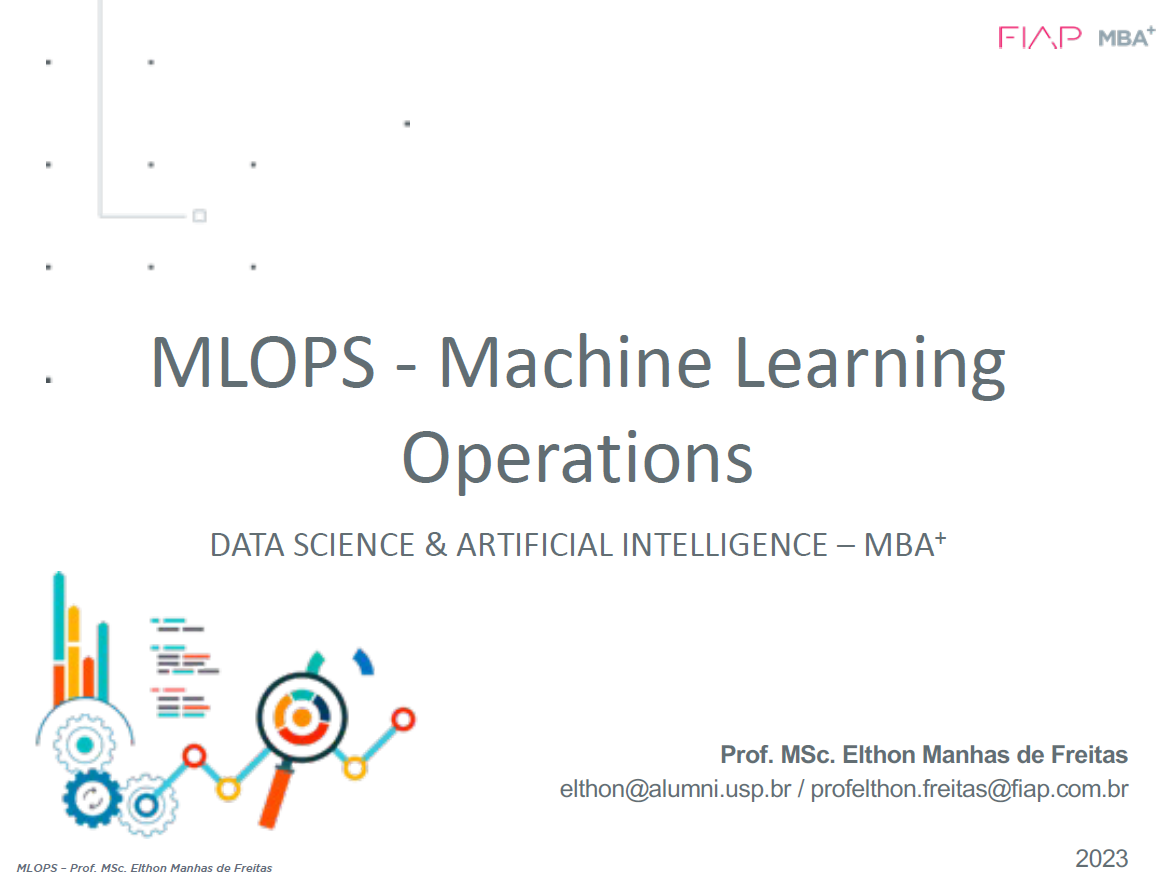

## Integrantes do Grupo:

* Marcus Vinicius Fugagnoli Laranjeira - RM 346611 - mvlaran@gmail.com
* Suélen Canabarro Oliveira Andrade - RM 346431 - suelen.canabarro@hotmail.com
* Rafael Alves Gama - RM 347064 - rafael.allvesgama@gmail.com

# Análise de Crédito e Propensão à Fraude

# Imports

In [1]:
import requests
import pandas as pd
import json

# Configurações

In [2]:
SERVER_IP = '20.84.48.88'
SERVER_PORT = '443'

# Preenchimento

In [4]:
#@title Dados do Cliente
# @markdown Informe o Gênero do Cliente: Homem (Male), Mulher (Female) ou Casal (Joint).
Gender = "Female" # @param ["Male", "Female", "Joint"]
# @markdown Informe se o Cliente tem crédito pré-aprovado: Sim (pre) ou Não (nopre).
approv_in_adv = "nopre" # @param ["nopre", "pre"]
# @markdown Informe a faixa etária do cliente.
age = 50 # @param {type:"slider", min:18, max:120, step:1}
# @markdown Informe a Região do Cliente Norte (North), Nordeste (North-East), Região Central (central) ou Sul (south).
Region = "central" # @param ["North", "North-East", "central", "south"]

# @markdown Informe o valor do bem (garantia) do Cliente.
property_value = 250000 # @param {type:"number"}
# @markdown Informe a renda do Cliente.
income = 125000 # @param {type:"number"}
# @markdown Informe o Score de Crédito do Cliente.
Credit_Score = 500 # @param {type:"integer"}


In [5]:
#age in ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '>74']
if int(age) < 25:
 age = '<25'
elif int(age) >= 25 and int(age) <= 34:
  age = '25-34'
elif int(age) >= 35 and int(age) <= 44:
  age = '35-44'
elif int(age) >= 45 and int(age) <= 54:
  age = '45-54'
elif int(age) >= 55 and int(age) <= 64:
  age = '55-64'
elif int(age) >= 65 and int(age) <= 74:
  age = '65-74'
else:
  age = '>74'

In [92]:
cliente = [{'Gender': Gender,
           'approv_in_adv': approv_in_adv,
           'property_value': property_value,
           'income' : income,
           'Credit_Score': Credit_Score,
           'age': age,
           'Region': Region
           }]
# Dados mock para testar mais de 1 cliente
# ao mesmo tempo na chamada da API
# cliente = [
#     { 'Gender': 'Male',
#       'approv_in_adv': 'pre',
#       'property_value': 125000,
#       'income' : 96000,
#       'Credit_Score': 780,
#       'age': '35-44',
#       'Region': 'central'
#     }, {
#       'Gender': 'Joint',
#       'approv_in_adv': 'nopre',
#       'property_value': 250000,
#       'income' : 78000,
#       'Credit_Score': 980,
#       'age': '45-54',
#       'Region': 'North-East'
#     }, {
#       'Gender': 'Female',
#       'approv_in_adv': 'nopre',
#       'property_value': 175000,
#       'income' : 233765,
#       'Credit_Score': 380,
#       'age': '<25',
#       'Region': 'south'
#     }
# ]

In [93]:
je = json.JSONEncoder()
dados = je.encode(cliente)

In [94]:
dados

'[{"Gender": "Male", "approv_in_adv": "pre", "property_value": 125000, "income": 96000, "Credit_Score": 780, "age": "35-44", "Region": "central"}, {"Gender": "Joint", "approv_in_adv": "nopre", "property_value": 250000, "income": 78000, "Credit_Score": 980, "age": "45-54", "Region": "North-East"}, {"Gender": "Female", "approv_in_adv": "nopre", "property_value": 175000, "income": 233765, "Credit_Score": 380, "age": "<25", "Region": "south"}]'

# Predição

O(s) cliente(s) agora será(ão) submetido(s) aos dois modelos de Machine Learning, classificação e clusterização preparados para a análise.

In [95]:
url = "http://{}:{}/predict".format(SERVER_IP, SERVER_PORT)
headers = {'Content-Type': 'application/json'}
conteudo = dados

In [96]:
response01 = requests.request("POST", url + f"?model=predict", headers=headers, data=conteudo)

In [97]:
response02 = requests.request("POST", url + f"?model=cluster", headers=headers, data=conteudo)

In [98]:
print("PREDICT: " + ("Conexão bem sucedida" if response01.status_code == 200 else "Erro " + str(response01.status_code) + " ao conectar"))

PREDICT: Conexão bem sucedida


In [99]:
print("CLUSTER: " + ("Conexão bem sucedida" if response02.status_code == 200 else "Erro " + str(response02.status_code) + " ao conectar"))

CLUSTER: Conexão bem sucedida


In [100]:
respostas01 = json.loads(response01.text.encode('utf8').decode())
respostas01

{'prediction': [0, 0, 1],
 'proba': [[0.95809406042099, 0.04190591350197792],
  [0.9502939581871033, 0.049706026911735535],
  [0.2824956774711609, 0.7175043225288391]]}

In [101]:
respostas02 = json.loads(response02.text.encode('utf8').decode())
respostas02

{'cluster': [1, 0, 1],
 'persona': ['south', 'north', 'south'],
 'prop_fraud': ['<= 0.5', '> 0.5', '<= 0.5']}

# Interpretação dos Resultados da Análise Preditiva

In [102]:
dc = {'cliente': [], 'Gender': [], 'approv_in_adv': [], 'property_value': [], 'income': [], 'Credit_Score': [], 'age': [], 'Region': [], 'adimProb': [], 'inadimProb': [], 'cluster': [], 'persona': [], 'propFraud': []}
for i in range(len(cliente)):
  st = "Adimplente" if respostas01['prediction'][i] == 0 else "Inadimplente"
  adimProb = round(respostas01['proba'][i][0] * 100, 2)
  inadimProb = round(respostas01['proba'][i][1] * 100, 2)
  predTxt = "Cliente Adimplente. (Probabilidade de adimplência de " + str(adimProb) + "% (probabilidade de inadimplência de " + str(inadimProb) + "%))." if st == 0 else "Cliente Inadimplente. (Probabilidade de inadimplência de " + str(inadimProb) + "% (probabilidade de adimplência de " + str(adimProb) + "%))."
  cluster = respostas02['cluster'][i]
  persona = respostas02['persona'][i]
  propFraud = respostas02['prop_fraud'][i]
  clustTxt = "Cliente tipo \"" + persona.capitalize() + "\" (Cluster " + str(cluster) + ") com " + ("ALTA" if cluster == 0 else "BAIXA") + " (" + propFraud + ") Propensão à Fraude."

  print("Cliente " + str(i) + ": \n\t" + predTxt + '\n\t' + clustTxt)

  dc['cliente'].append(i)
  dc['Gender'].append(cliente[i]['Gender'])
  dc['approv_in_adv'].append(cliente[i]['approv_in_adv'])
  dc['property_value'].append(cliente[i]['property_value'])
  dc['income'].append(cliente[i]['income'])
  dc['Credit_Score'].append(cliente[i]['Credit_Score'])
  dc['age'].append(cliente[i]['age'])
  dc['Region'].append(cliente[i]['Region'])
  dc['adimProb'].append(adimProb)
  dc['inadimProb'].append(inadimProb)
  dc['cluster'].append(cluster)
  dc['persona'].append(persona)
  dc['propFraud'].append(propFraud)

print()

df = pd.DataFrame(dc)

df.T

Cliente 0: 
	Cliente Inadimplente. (Probabilidade de inadimplência de 4.19% (probabilidade de adimplência de 95.81%)).
	Cliente tipo "South" (Cluster 1) com BAIXA (<= 0.5) Propensão à Fraude.
Cliente 1: 
	Cliente Inadimplente. (Probabilidade de inadimplência de 4.97% (probabilidade de adimplência de 95.03%)).
	Cliente tipo "North" (Cluster 0) com ALTA (> 0.5) Propensão à Fraude.
Cliente 2: 
	Cliente Inadimplente. (Probabilidade de inadimplência de 71.75% (probabilidade de adimplência de 28.25%)).
	Cliente tipo "South" (Cluster 1) com BAIXA (<= 0.5) Propensão à Fraude.



,0,1,2
cliente,0,1,2
Gender,Male,Joint,Female
approv_in_adv,pre,nopre,nopre
property_value,125000,250000,175000
income,96000,78000,233765
Credit_Score,780,980,380
age,35-44,45-54,<25
Region,central,North-East,south
adimProb,95.81,95.03,28.25
inadimProb,4.19,4.97,71.75
